In [5]:
using Pkg
using Embeddings
using Plots
using WordTokenizers
using TextAnalysis
using DelimitedFiles
using Distances
using Statistics
using MultivariateStats

In [6]:
embd=load_embeddings(Word2Vec)

# Loading Google's own Word2Vec pre-trained embeddings

Embeddings.EmbeddingTable{Array{Float32,2},Array{String,1}}(Float32[0.06731994 0.05295623 … -0.21142985 0.013637338; -0.05344657 0.06545979 … -0.0087888 -0.07428761; … ; -0.0073346887 0.010894641 … -0.0040515745 0.015611163; -0.0051456536 -0.047072206 … -0.034157887 0.039655942], ["</s>", "in", "for", "that", "is", "on", "##", "The", "with", "said"  …  "#-###-PA-PARKS", "Lackmeyer", "PERVEZ", "KUNDI", "Budhadeb", "Nautsch", "Antuane", "tricorne", "VISIONPAD", "RAFFAELE"])

In [81]:
const get_word_index = Dict(word=>ii for (ii,word) in enumerate(embd.vocab))
# Function for getting word index in the embedded table

Dict{String,Int64} with 929022 entries:
  "Tencent"           => 69121
  "5IP"               => 539914
  "Sawtelle"          => 136142
  "Patchway"          => 308084
  "titration"         => 121278
  "Misrule"           => 235915
  "Danderson"         => 486555
  "Bigbie"            => 102277
  "Francel"           => 279181
  "WealthCentral"     => 575705
  "Montiy"            => 664165
  "Konigsmark"        => 731590
  "Commis"            => 336102
  "entomb"            => 189686
  "Notch"             => 76478
  "DUGAS"             => 437342
  "Piliang"           => 825975
  "Papahanaumokuakea" => 429911
  "HID"               => 78629
  "Skaw"              => 542340
  "LWIB"              => 589261
  "Pettine"           => 131546
  "Scabbers"          => 676350
  "Core"              => 11282
  "Sofya"             => 224129
  ⋮                   => ⋮

In [8]:
function get_embedding(word)
    ind = get_word_index[word]
    emb = embd.embeddings[:,ind]
    return emb
end

#Function for getting the vectors for a specific word

get_embedding (generic function with 1 method)

In [82]:
get_embedding("human")

300-element Array{Float32,1}:
  0.022186058
  0.036621526
  0.042821996
  0.11238352
 -0.096494816
  0.007556823
  0.16198729
 -0.012594705
 -0.01898894
  0.02518941
 -0.037009057
 -0.017729469
 -0.09571976
  ⋮
  0.08874423
  0.079055995
 -0.084093876
 -0.025964469
 -0.1240094
  0.03468388
 -0.0883567
  0.048828702
  0.0018892058
 -0.028289646
  0.06432988
  0.036234

In [10]:
a=embd.vocab

#a shows the vocab of our embedded table

929022-element Array{String,1}:
 "</s>"
 "in"
 "for"
 "that"
 "is"
 "on"
 "##"
 "The"
 "with"
 "said"
 "was"
 "the"
 "at"
 ⋮
 "PLPM"
 "Orejana"
 "#-###-PA-PARKS"
 "Lackmeyer"
 "PERVEZ"
 "KUNDI"
 "Budhadeb"
 "Nautsch"
 "Antuane"
 "tricorne"
 "VISIONPAD"
 "RAFFAELE"

In [11]:
b=embd.embeddings

#b shows the  embeddings in our embedded table

300×929022 Array{Float32,2}:
  0.0673199    0.0529562  -0.00851202  …  -0.21143      0.0136373
 -0.0534466    0.0654598  -0.0342245      -0.0087888   -0.0742876
  0.0189906    0.0661953   0.0322839       0.0952432   -0.0276336
  0.0914278    0.0470722   0.0458679      -0.0248081    0.043783
  0.0659553    0.0522207  -0.0131429      -0.00247769   0.0549082
 -0.0836951   -0.0820086  -0.0462207   …  -0.0122794    0.013099
 -0.00181946  -0.0614145  -0.00094823     -0.057096    -0.084695
 -0.0250175   -0.11621    -0.0522188      -0.0386458    0.0523961
 -0.0343423    0.0156294   0.0465735      -0.0118431   -0.0771586
  0.0641359    0.0992929   0.0624509       0.0204449    0.114841
 -0.0609518   -0.0856861  -0.122785    …  -0.0698117   -0.0983324
 -0.036844    -0.028133   -0.0287556       0.0115314    0.0244037
 -0.0450316    0.0522207   0.0515131      -0.00629552  -0.0193794
  ⋮                                    ⋱   ⋮           
 -0.0586775   -0.0318105   0.0294613      -0.0713077    0.002

In [12]:
size(a)

#size of a

(929022,)

In [13]:
size(b)

#size of b

(300, 929022)

In [14]:
get_word_index["human"]

#at what index our word is present

1270

In [15]:
cosine(x,y)=1-cosine_dist(x,y)

#using distances.jl we derive a formula for cosine similarity 

cosine (generic function with 1 method)

In [46]:
cosine(get_embedding("dog"),get_embedding("puppy"))

#checking the similarity between dog and puppy

0.81064296f0

In [55]:
cosine(get_embedding("laptop"),get_embedding("medicine"))

0.10783821f0

In [56]:
cosine(get_embedding("cat"), get_embedding("kitten"))>cosine(get_embedding("song"),get_embedding("car"))

#returns true because cat and kitten are more similar than song and car are

true

In [47]:
function closest(v, n=25)
    list=[(x,cosine(embd.embeddings'[x,:], v)) for x in 1:size(embd.embeddings)[2]]
    topn_idx=sort(list, by = x -> x[2], rev=true)[1:n]
    return [embd.vocab[h] for (h,_) in topn_idx]
end

#function for finding similar words or closest words

closest (generic function with 2 methods)

In [48]:
closest(get_embedding("girl"))

25-element Array{String,1}:
 "girl"
 "boy"
 "woman"
 "teenager"
 "schoolgirl"
 "daughter"
 "mother"
 "toddler"
 "girls"
 "niece"
 "teen"
 "man"
 "child"
 "grandmother"
 "stepdaughter"
 "boyfriend"
 "boys"
 "babysitter"
 "aunt"
 "lass"
 "granddaughter"
 "girlfriend"
 "Girl"
 "tomboy"
 "baby"

In [49]:
closest(get_embedding("marine")+get_embedding("animal"))

#we can see whale, dolphin, manatee are all marine animals

25-element Array{String,1}:
 "marine"
 "animal"
 "animals"
 "wildlife"
 "mammal"
 "cetacean"
 "aquatic"
 "whale"
 "reptile"
 "Animal"
 "manatee"
 "pet"
 "dolphin"
 "dolphins"
 "mammals"
 "livestock"
 "turtle"
 "whales"
 "otter"
 "amphibian"
 "Wildlife"
 "dugongs"
 "fisheries"
 "aquaculture"
 "sealife"

In [50]:
closest(mean([get_embedding("day"),get_embedding("night")]))

#this shows what comes between day and night, afternoon, evening are some examples

25-element Array{String,1}:
 "day"
 "night"
 "evening"
 "afternoon"
 "morning"
 "week"
 "weekend"
 "nights"
 "Saturday"
 "Friday"
 "Sunday"
 "hours"
 "Monday"
 "month"
 "days"
 "Thursday"
 "hour"
 "Wednesday"
 "lunchtime"
 "Tuesday"
 "tonight"
 "afteroon"
 "Thurday"
 "weekends"
 "midnight"

In [51]:
closest(get_embedding("man")-get_embedding("woman")+get_embedding("queen"))

#what is man to x when woman is to queen, therefore x=king

25-element Array{String,1}:
 "queen"
 "king"
 "kings"
 "queens"
 "monarch"
 "prince"
 "princess"
 "princes"
 "royal"
 "joker"
 "Queen"
 "royals"
 "uncrowned"
 "princesses"
 "monarchs"
 "legend"
 "kingpin"
 "overlord"
 "lord"
 "winker"
 "jester"
 "regal"
 "coronets"
 "emperor"
 "palace"

In [52]:
closest(get_embedding("lion")-get_embedding("lioness")+get_embedding("tigress"))

#what is x to tigress when lion is to lioness, therefore x is tiger

25-element Array{String,1}:
 "lion"
 "tigress"
 "tiger"
 "tigers"
 "elephant"
 "sambars"
 "leopard"
 "panda"
 "tuskers"
 "monkey"
 "lions"
 "tranquillized"
 "tusker"
 "wolf"
 "elephants"
 "panther"
 "Chhatbir"
 "gorilla"
 "cub"
 "pachyderm"
 "crocodile"
 "blackbucks"
 "Ranthambore"
 "dragon"
 "chinkaras"

In [114]:
closest(get_embedding("sentiment")+get_embedding("language"))

#as we can see pessimism, mood are there in our 25 element array

25-element Array{String,1}:
 "language"
 "sentiment"
 "sentiments"
 "langauge"
 "Language"
 "Sentiment"
 "dialect"
 "English"
 "languages"
 "feelings"
 "putonghua"
 "attitudes"
 "vernaculars"
 "pessimism"
 "mood"
 "vocabulary"
 "Americanisms"
 "Taglish"
 "rhetoric"
 "idioms"
 "dialectal"
 "translation"
 "Yawi"
 "vatican.va"
 "wording"

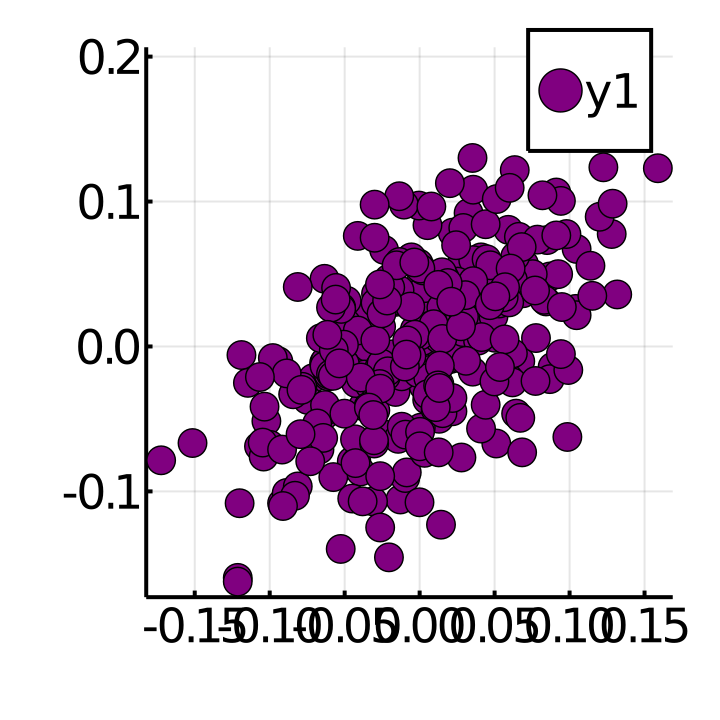

In [118]:
x1=get_embedding("boots");
y1=get_embedding("shoe");
using Plots
Plots.scatter(x1,y1,size=(180,180),color="purple")

#visualizing similarity between the vectors

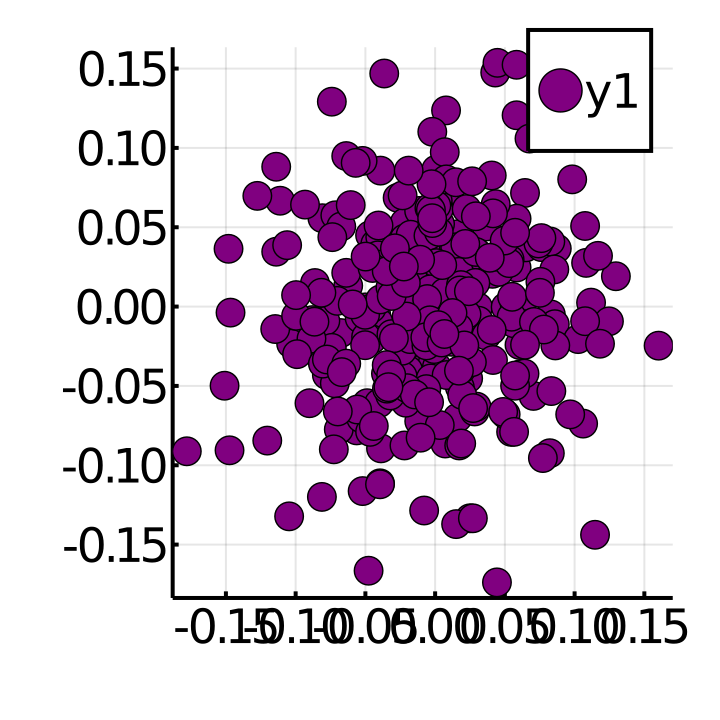

In [119]:
x2=get_embedding("phone");
y2=get_embedding("cucumber");
using Plots
Plots.scatter(x2,y2,size=(180,180),color="purple")

# we can there are many outliers which presents that phone and cucumber are very dissimalar words

In [72]:
using CorpusLoaders

In [85]:
dataset_train_pos=CorpusLoaders.load(IMDB("train_pos"))
#loading train_pos set from the dataset

Channel{Array{Array{String,1},1}}(sz_max:4,sz_curr:4)

In [86]:
dataset_train_neg=CorpusLoaders.load(IMDB("train_neg"))
#loading train_neg set from the dataset

Channel{Array{Array{String,1},1}}(sz_max:4,sz_curr:4)

In [87]:
dataset_test_pos=CorpusLoaders.load(IMDB("test_pos"))
#loading test_pos set from the dataset

Channel{Array{Array{String,1},1}}(sz_max:4,sz_curr:4)

In [88]:
dataset_test_neg=CorpusLoaders.load(IMDB("test_neg"))
#loading test_neg set from the dataset

Channel{Array{Array{String,1},1}}(sz_max:4,sz_curr:4)

In [89]:
using Base.Iterators
ptrain=collect(take(dataset_train_pos,2))
#convert it into an array of array of strings

2-element Array{Array{Array{String,1},1},1}:
 [["Bromwell", "High", "is", "a", "cartoon", "comedy", "."], ["It", "ran", "at", "the", "same", "time", "as", "some", "other", "programs", "about", "school", "life", ",", "such", "as", "\"", "Teachers", "\"", "."], ["My", "35", "years", "in", "the", "teaching", "profession", "lead", "me", "to"  …  "much", "closer", "to", "reality", "than", "is", "\"", "Teachers", "\"", "."], ["The", "scramble", "to", "survive", "financially", ",", "the", "insightful", "students", "who"  …  "me", "of", "the", "schools", "I", "knew", "and", "their", "students", "."], ["When", "I", "saw", "the", "episode", "in", "which", "a", "student", "repeatedly"  …  "to", "burn", "down", "the", "school", ",", "I", "immediately", "recalled", "at"], ["High", "."], ["A", "classic", "line", ":", "INSPECTOR", ":", "I", "'", "m", "here", "to", "sack", "one", "of", "your", "teachers", "."], ["STUDENT", ":", "Welcome", "to", "Bromwell", "High", "."], ["I", "expect", "that", "many",

In [90]:
ntrain=collect(take(dataset_train_neg,2))
#convert it into an array of array of strings

2-element Array{Array{Array{String,1},1},1}:
 [["Story", "of", "a", "man", "who", "has", "unnatural", "feelings", "for", "a", "pig", "."], ["Starts", "out", "with", "a", "opening", "scene", "that", "is", "a", "terrific", "example", "of", "absurd", "comedy", "."], ["A", "formal", "orchestra", "audience", "is", "turned", "into", "an", "insane", ","  …  "by", "the", "crazy", "chantings", "of", "it", "'", "s", "singers", "."], ["Unfortunately", "it", "stays", "absurd", "the", "WHOLE", "time", "with", "no", "general", "narrative", "eventually", "making", "it", "just", "too", "off", "putting", "."], ["Even", "those", "from", "the", "era", "should", "be", "turned", "off", "."], ["The", "cryptic", "dialogue", "would", "make", "Shakespeare", "seem", "easy", "to", "a", "third", "grader", "."], ["On", "a", "technical", "level", "it", "'", "s", "better", "than", "you"  …  "with", "some", "good", "cinematography", "by", "future", "great", "Vilmos", "Zsigmond", "."], ["Future", "stars", "Sally", "Ki

In [91]:
ptest=collect(take(dataset_test_pos,2))
#convert it into an array of array of strings

2-element Array{Array{Array{String,1},1},1}:
 [["I", "went", "and", "saw", "this", "movie", "last", "night", "after", "being", "coaxed", "to", "by", "a", "few", "friends", "of", "mine", "."], ["I", "'", "ll", "admit", "that", "I", "was", "reluctant", "to", "see"  …  "Ashton", "Kutcher", "he", "was", "only", "able", "to", "do", "comedy", "."], ["I", "was", "wrong", "."], ["Kutcher", "played", "the", "character", "of", "Jake", "Fischer", "very", "well", ",", "and", "Kevin", "Costner", "played", "Ben", "Randall", "with", "such", "professionalism", "."], ["The", "sign", "of", "a", "good", "movie", "is", "that", "it", "can", "toy", "with", "our", "emotions", "."], ["This", "one", "did", "exactly", "that", "."], ["The", "entire", "theater", "(", "which", "was", "sold", "out", ")", "was"  …  "and", "were", "moved", "to", "tears", "during", "the", "second", "half", "."], ["While", "exiting", "the", "theater", "I", "not", "only", "saw", "many", "women"  …  "trying", "desperately", "not", "to", 

In [92]:
ntest=collect(take(dataset_test_neg,2))
#convert it into an array of array of strings

2-element Array{Array{Array{String,1},1},1}:
 [["Once", "again", "Mr.", "Costner", "has", "dragged", "out", "a", "movie", "for", "far", "longer", "than", "necessary", "."], ["Aside", "from", "the", "terrific", "sea", "rescue", "sequences", ",", "of", "which"  …  "just", "did", "not", "care", "about", "any", "of", "the", "characters", "."], ["Most", "of", "us", "have", "ghosts", "in", "the", "closet", ",", "and"  …  "later", ",", "by", "which", "time", "I", "did", "not", "care", "."], ["The", "character", "we", "should", "really", "care", "about", "is", "a", "very", "cocky", ",", "overconfident", "Ashton", "Kutcher", "."], ["The", "problem", "is", "he", "comes", "off", "as", "kid", "who", "thinks"  …  "him", "and", "shows", "no", "signs", "of", "a", "cluttered", "closet", "."], ["His", "only", "obstacle", "appears", "to", "be", "winning", "over", "Costner", "."], ["Finally", "when", "we", "are", "well", "past", "the", "half", "way", "point"  …  "Costner", "tells", "us", "all", "about", 

In [93]:
using Unicode
function convert_clean_arr(arr)
    arr = string.(arr)
    arr = Unicode.normalize.(arr, stripmark=true)
    arr = map(x -> replace(x, r"[^a-zA-Z0-9_]" => " "), arr)
    return arr
end

#function to remove punctuation marks

convert_clean_arr (generic function with 1 method)

In [94]:
ptr=string.(ptrain)
#converting to string

2-element Array{String,1}:
 "[[\"Bromwell\", \"High\", \"is\", \"a\", \"cartoon\", \"comedy\", \".\"], [\"It\", \"ran\", \"at\", \"the\", \"same\", \"time\", \"as\", \"some\", \"other\", \"programs\", \"about\", \"school\", \"life\", \",\", \"such\", \"as\", \"\\\"\", \"Teachers\", \"\\\"\", \".\"], [\"My\", \"35\", \"years\", \"in\", \"the\", \"teaching\", \"profession\", \"lead\", \"me\", \"to\", \"believe\", \"that\", \"Bromwell\", \"High\", \"'\", \"s\", \"satire\", \"is\", \"much\", \"closer\", \"to\", \"reality\", \"than\", \"is\", \"\\\"\", \"Teachers\", \"\\\"\", \".\"], [\"The\", \"scramble\", \"to\", \"survive\", \"financially\", \",\", \"the\", \"insightful\", \"students\", \"who\", \"can\", \"see\", \"right\", \"through\", \"their\", \"pathetic\", \"teachers\", \"'\", \"pomp\", \",\", \"the\", \"pettiness\", \"of\", \"the\", \"whole\", \"situation\", \",\", \"all\", \"remind\", \"me\", \"of\", \"the\", \"schools\", \"I\", \"knew\", \"and\", \"their\", \"students\", \".\"], 

In [95]:
ntr=string.(ntrain)
#converting to string

2-element Array{String,1}:
 "[[\"Story\", \"of\", \"a\", \"man\", \"who\", \"has\", \"unnatural\", \"feelings\", \"for\", \"a\", \"pig\", \".\"], [\"Starts\", \"out\", \"with\", \"a\", \"opening\", \"scene\", \"that\", \"is\", \"a\", \"terrific\", \"example\", \"of\", \"absurd\", \"comedy\", \".\"], [\"A\", \"formal\", \"orchestra\", \"audience\", \"is\", \"turned\", \"into\", \"an\", \"insane\", \",\", \"violent\", \"mob\", \"by\", \"the\", \"crazy\", \"chantings\", \"of\", \"it\", \"'\", \"s\", \"singers\", \".\"], [\"Unfortunately\", \"it\", \"stays\", \"absurd\", \"the\", \"WHOLE\", \"time\", \"with\", \"no\", \"general\", \"narrative\", \"eventually\", \"making\", \"it\", \"just\", \"too\", \"off\", \"putting\", \".\"], [\"Even\", \"those\", \"from\", \"the\", \"era\", \"should\", \"be\", \"turned\", \"off\", \".\"], [\"The\", \"cryptic\", \"dialogue\", \"would\", \"make\", \"Shakespeare\", \"seem\", \"easy\", \"to\", \"a\", \"third\", \"grader\", \".\"], [\"On\", \"a\", \"technic

In [96]:
pte=string.(ptest)
#converting to string

2-element Array{String,1}:
 "[[\"I\", \"went\", \"and\", \"saw\", \"this\", \"movie\", \"last\", \"night\", \"after\", \"being\", \"coaxed\", \"to\", \"by\", \"a\", \"few\", \"friends\", \"of\", \"mine\", \".\"], [\"I\", \"'\", \"ll\", \"admit\", \"that\", \"I\", \"was\", \"reluctant\", \"to\", \"see\", \"it\", \"because\", \"from\", \"what\", \"I\", \"knew\", \"of\", \"Ashton\", \"Kutcher\", \"he\", \"was\", \"only\", \"able\", \"to\", \"do\", \"comedy\", \".\"], [\"I\", \"was\", \"wrong\", \".\"], [\"Kutcher\", \"played\", \"the\", \"character\", \"of\", \"Jake\", \"Fischer\", \"very\", \"well\", \",\", \"and\", \"Kevin\", \"Costner\", \"played\", \"Ben\", \"Randall\", \"with\", \"such\", \"professionalism\", \".\"], [\"The\", \"sign\", \"of\", \"a\", \"good\", \"movie\", \"is\", \"that\", \"it\", \"can\", \"toy\", \"with\", \"our\", \"emotions\", \".\"], [\"This\", \"one\", \"did\", \"exactly\", \"that\", \".\"], [\"The\", \"entire\", \"theater\", \"(\", \"which\", \"was\", \"sold\"

In [97]:
nte=string.(ntest)
#converting to string

2-element Array{String,1}:
 "[[\"Once\", \"again\", \"Mr.\", \"Costner\", \"has\", \"dragged\", \"out\", \"a\", \"movie\", \"for\", \"far\", \"longer\", \"than\", \"necessary\", \".\"], [\"Aside\", \"from\", \"the\", \"terrific\", \"sea\", \"rescue\", \"sequences\", \",\", \"of\", \"which\", \"there\", \"are\", \"very\", \"few\", \"I\", \"just\", \"did\", \"not\", \"care\", \"about\", \"any\", \"of\", \"the\", \"characters\", \".\"], [\"Most\", \"of\", \"us\", \"have\", \"ghosts\", \"in\", \"the\", \"closet\", \",\", \"and\", \"Costner\", \"'\", \"s\", \"character\", \"are\", \"realized\", \"early\", \"on\", \",\", \"and\", \"then\", \"forgotten\", \"until\", \"much\", \"later\", \",\", \"by\", \"which\", \"time\", \"I\", \"did\", \"not\", \"care\", \".\"], [\"The\", \"character\", \"we\", \"should\", \"really\", \"care\", \"about\", \"is\", \"a\", \"very\", \"cocky\", \",\", \"overconfident\", \"Ashton\", \"Kutcher\", \".\"], [\"The\", \"problem\", \"is\", \"he\", \"comes\", \"off\", 

In [99]:
ptr_pun=convert_clean_arr(ptr)
p1=string.(ptr_pun)
join(p1)
#converting from any array to array string then joining it to become one large string


"   Bromwell    High    is    a    cartoon    comedy           It    ran    at    the    same    time    as    some    other    programs    about    school    life         such    as          Teachers                 My    35    years    in    the    teaching    profession    lead    me    to    believe    that    Bromwell    High         s    satire    is    much    closer    to    reality    than    is          Teachers                 The    scramble    to    survive    financially         the    insightful    students    who    can    see    right    through    their    pathetic    teachers         pomp         the    pettiness    of    the    whole    situation         all    remind    me    of    the    schools    I    knew    and    their    students           When    I    saw    the    episode    in    which    a    student    repeatedly    tried    to    burn    down    the    school         I    immediately    recalled    at      High           A    classic    line         IN

In [100]:
ntr_pun=convert_clean_arr(ntr)
n1=string.(ntr_pun)
join(n1)
#converting from any array to array string then joining it to become one large string

"   Story    of    a    man    who    has    unnatural    feelings    for    a    pig           Starts    out    with    a    opening    scene    that    is    a    terrific    example    of    absurd    comedy           A    formal    orchestra    audience    is    turned    into    an    insane         violent    mob    by    the    crazy    chantings    of    it         s    singers           Unfortunately    it    stays    absurd    the    WHOLE    time    with    no    general    narrative    eventually    making    it    just    too    off    putting           Even    those    from    the    era    should    be    turned    off           The    cryptic    dialogue    would    make    Shakespeare    seem    easy    to    a    third    grader           On    a    technical    level    it         s    better    than    you    might    think    with    some    good    cinematography    by    future    great    Vilmos    Zsigmond           Future    stars    Sally    Kirkland    and  

In [101]:
pte_pun=convert_clean_arr(pte)
p2=string.(pte_pun)
join(p2)
#converting from any array to array string then joining it to become one large string

"   I    went    and    saw    this    movie    last    night    after    being    coaxed    to    by    a    few    friends    of    mine           I         ll    admit    that    I    was    reluctant    to    see    it    because    from    what    I    knew    of    Ashton    Kutcher    he    was    only    able    to    do    comedy           I    was    wrong           Kutcher    played    the    character    of    Jake    Fischer    very    well         and    Kevin    Costner    played    Ben    Randall    with    such    professionalism           The    sign    of    a    good    movie    is    that    it    can    toy    with    our    emotions           This    one    did    exactly    that           The    entire    theater         which    was    sold    out         was    overcome    by    laughter    during    the    first    half    of    the    movie         and    were    moved    to    tears    during    the    second    half           While    exiting    the    the

In [102]:
nte_pun=convert_clean_arr(nte)
n2=string.(nte_pun)
join(n2)
#converting from any array to array string then joining it to become one large string

"   Once    again    Mr     Costner    has    dragged    out    a    movie    for    far    longer    than    necessary           Aside    from    the    terrific    sea    rescue    sequences         of    which    there    are    very    few    I    just    did    not    care    about    any    of    the    characters           Most    of    us    have    ghosts    in    the    closet         and    Costner         s    character    are    realized    early    on         and    then    forgotten    until    much    later         by    which    time    I    did    not    care           The    character    we    should    really    care    about    is    a    very    cocky         overconfident    Ashton    Kutcher           The    problem    is    he    comes    off    as    kid    who    thinks    he         s    better    than    anyone    else    around    him    and    shows    no    signs    of    a    cluttered    closet           His    only    obstacle    appears    to    be  

In [84]:
using TextAnalysis: NaiveBayesClassifier, fit!, predict

#using naive bayes classifier for sentiment analysis between positive and negative

In [78]:
model1=NaiveBayesClassifier([:positive,:negative])

NaiveBayesClassifier{Symbol}(String[], [:positive, :negative], Array{Int64}(undef,0,2))

In [103]:
fit!(model1,join(p1),:positive)
#fitting train_pos model as positive

NaiveBayesClassifier{Symbol}(["Welcome", "mutual", "fight", "closer", "give", "step", "What", "many", "that", "while"  …  "programs", "maybe", "sidewalk", "me", "money", "Spaceballs", "wall", "satire", "streets", "he"], [:positive, :negative], [2 1; 2 1; … ; 5 1; 6 1])

In [104]:
fit!(model1,join(n1),:negative)
#fitting train_neg model as negative

NaiveBayesClassifier{Symbol}(["Welcome", "mutual", "fight", "closer", "give", "step", "What", "many", "that", "while"  …  "second", "cargo", "too", "entertained", "Sally", "few", "into", "popular", "Kennedy", "longer"], [:positive, :negative], [2 1; 2 1; … ; 1 3; 1 2])

In [105]:
fit!(model1,join(p2),:positive)
#fitting test_pos model as positive

NaiveBayesClassifier{Symbol}(["Welcome", "mutual", "fight", "closer", "give", "step", "What", "many", "that", "while"  …  "dozen", "average", "American", "twentieth", "desperately", "indicates", "men", "goes", "further", "Randall"], [:positive, :negative], [2 1; 2 1; … ; 2 1; 2 1])

In [106]:
fit!(model1,join(n2),:negative)
#fitting test_neg model as negative

NaiveBayesClassifier{Symbol}(["Welcome", "mutual", "fight", "closer", "give", "step", "What", "many", "that", "while"  …  "watching", "script", "kid", "countless", "itself", "Learning", "From", "somewhat", "complete", "heck"], [:positive, :negative], [2 1; 2 1; … ; 1 2; 1 3])

In [107]:
predict(model1,"it shows a tender side")
#prediction for the string comes as positive which is one hundred percent correct so accuracy is actually good

Dict{Symbol,Float64} with 2 entries:
  :negative => 0.0975776
  :positive => 0.902422

In [108]:
predict(model1,"unnatural feelings for a pig")
#prediction for the string comes as negative which is one hundred percent correct so accuracy is actually good

Dict{Symbol,Float64} with 2 entries:
  :negative => 0.820774
  :positive => 0.179226

In [109]:
predict(model1,"The sign of a good movie is that it can toy with our emotions")
#prediction for the string comes as positive which is one hundred percent correct so accuracy is actually good

Dict{Symbol,Float64} with 2 entries:
  :negative => 0.0304598
  :positive => 0.96954

In [110]:
predict(model1,"once again Mr. Costner has dragged out a movie")
#prediction for the string comes as negative which is one hundred percent correct so accuracy is actually good

Dict{Symbol,Float64} with 2 entries:
  :negative => 0.825864
  :positive => 0.174136

In [111]:
predict(model1,"very cocky overconfident ashton kutcher")
#prediction for the string comes as negative but the accuracy is less because 'ashton kutcher' is in positive models too

Dict{Symbol,Float64} with 2 entries:
  :negative => 0.74431
  :positive => 0.25569